# Import Library

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

# PRJ_DIR = os.path.abspath('')

In [4]:
data = pd.read_csv("/content/drive/MyDrive/EPL/dataH/full.csv")

# Data Cleaning

In [5]:
print(data)

        minute  half       ht_elo       at_elo  ht_goal  at_goal  pass  \
0            0     1  1824.001221  1974.961670        0        0     0   
1            1     1  1824.001221  1974.961670        0        0    13   
2            2     1  1824.001221  1974.961670        0        0    16   
3            3     1  1824.001221  1974.961670        0        0    21   
4            4     1  1824.001221  1974.961670        0        0    18   
...        ...   ...          ...          ...      ...      ...   ...   
219300      91     2  1732.150269  1790.456909        5        0   306   
219301      92     2  1732.150269  1790.456909        5        0   296   
219302      93     2  1732.150269  1790.456909        5        0   293   
219303      94     2  1732.150269  1790.456909        5        0   300   
219304      95     2  1732.150269  1790.456909        5        0   318   

        short_pass  long_pass  final_3rd_pass  ...  dispossessed  turnover  \
0                0          0    

Each equivalent to each minute in the match, with the equivalent events happened which are marked down by multiple features underneath.

In [6]:
data.describe()

,minute,half,ht_elo,at_elo,ht_goal,at_goal,pass,short_pass,long_pass,final_3rd_pass,...,shot_fast_break,dispossessed,turnover,duel,tackle,interception,clearance,offside,yellow,red
count,219305.000000,219305.000000,219305.000000,219305.000000,219305.000000,219305.000000,219305.000000,219305.000000,219305.000000,219305.000000,...,219305.000000,219305.000000,219305.000000,219305.000000,219305.000000,219305.000000,219305.000000,219305.000000,219305.000000,219305.000000
mean,47.685839,1.512081,1762.032470,1762.160493,0.739281,0.618239,11.904507,11.409822,-0.516523,11.179937,...,0.019306,0.014459,0.072114,0.206411,0.027341,-0.096094,-1.791738,0.064189,-0.082401,-0.001993
std,102.510834,0.500566,117.692336,117.649750,1.004300,0.906915,154.881371,152.070965,9.390884,63.650239,...,0.744207,3.463129,3.657048,4.319014,3.289139,3.713302,8.877550,1.457057,1.032618,0.215199
min,0.000000,1.000000,1499.452393,1504.429077,0.000000,0.000000,-738.000000,-724.000000,-51.000000,-343.000000,...,-5.000000,-21.000000,-20.000000,-25.000000,-16.000000,-22.000000,-72.000000,-8.000000,-5.000000,-2.000000
25%,24.000000,1.000000,1680.553345,1679.024780,0.000000,0.000000,-66.000000,-65.000000,-6.000000,-17.000000,...,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-6.000000,-1.000000,-1.000000,0.000000
50%,47.000000,2.000000,1737.786133,1737.465332,0.000000,0.000000,6.000000,6.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
75%,71.000000,2.000000,1838.137451,1837.989624,1.000000,1.000000,91.000000,89.000000,5.000000,38.000000,...,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,0.000000,0.000000
max,32767.000000,14.000000,2088.261963,2090.136230,9.000000,8.000000,772.000000,743.000000,44.000000,408.000000,...,6.000000,16.000000,20.000000,28.000000,16.000000,20.000000,47.000000,9.000000,6.000000,2.000000


array([[<Axes: title={'center': 'minute'}>,
        <Axes: title={'center': 'half'}>,
        <Axes: title={'center': 'ht_elo'}>,
        <Axes: title={'center': 'at_elo'}>,
        <Axes: title={'center': 'ht_goal'}>],
       [<Axes: title={'center': 'at_goal'}>,
        <Axes: title={'center': 'pass'}>,
        <Axes: title={'center': 'short_pass'}>,
        <Axes: title={'center': 'long_pass'}>,
        <Axes: title={'center': 'final_3rd_pass'}>],
       [<Axes: title={'center': 'key_pass'}>,
        <Axes: title={'center': 'cross'}>,
        <Axes: title={'center': 'corner'}>,
        <Axes: title={'center': 'big_chance'}>,
        <Axes: title={'center': 'shot'}>],
       [<Axes: title={'center': 'shot_6_yard_box'}>,
        <Axes: title={'center': 'shot_penalty_box'}>,
        <Axes: title={'center': 'shot_open_play'}>,
        <Axes: title={'center': 'shot_fast_break'}>,
        <Axes: title={'center': 'dispossessed'}>],
       [<Axes: title={'center': 'turnover'}>,
        <Axe

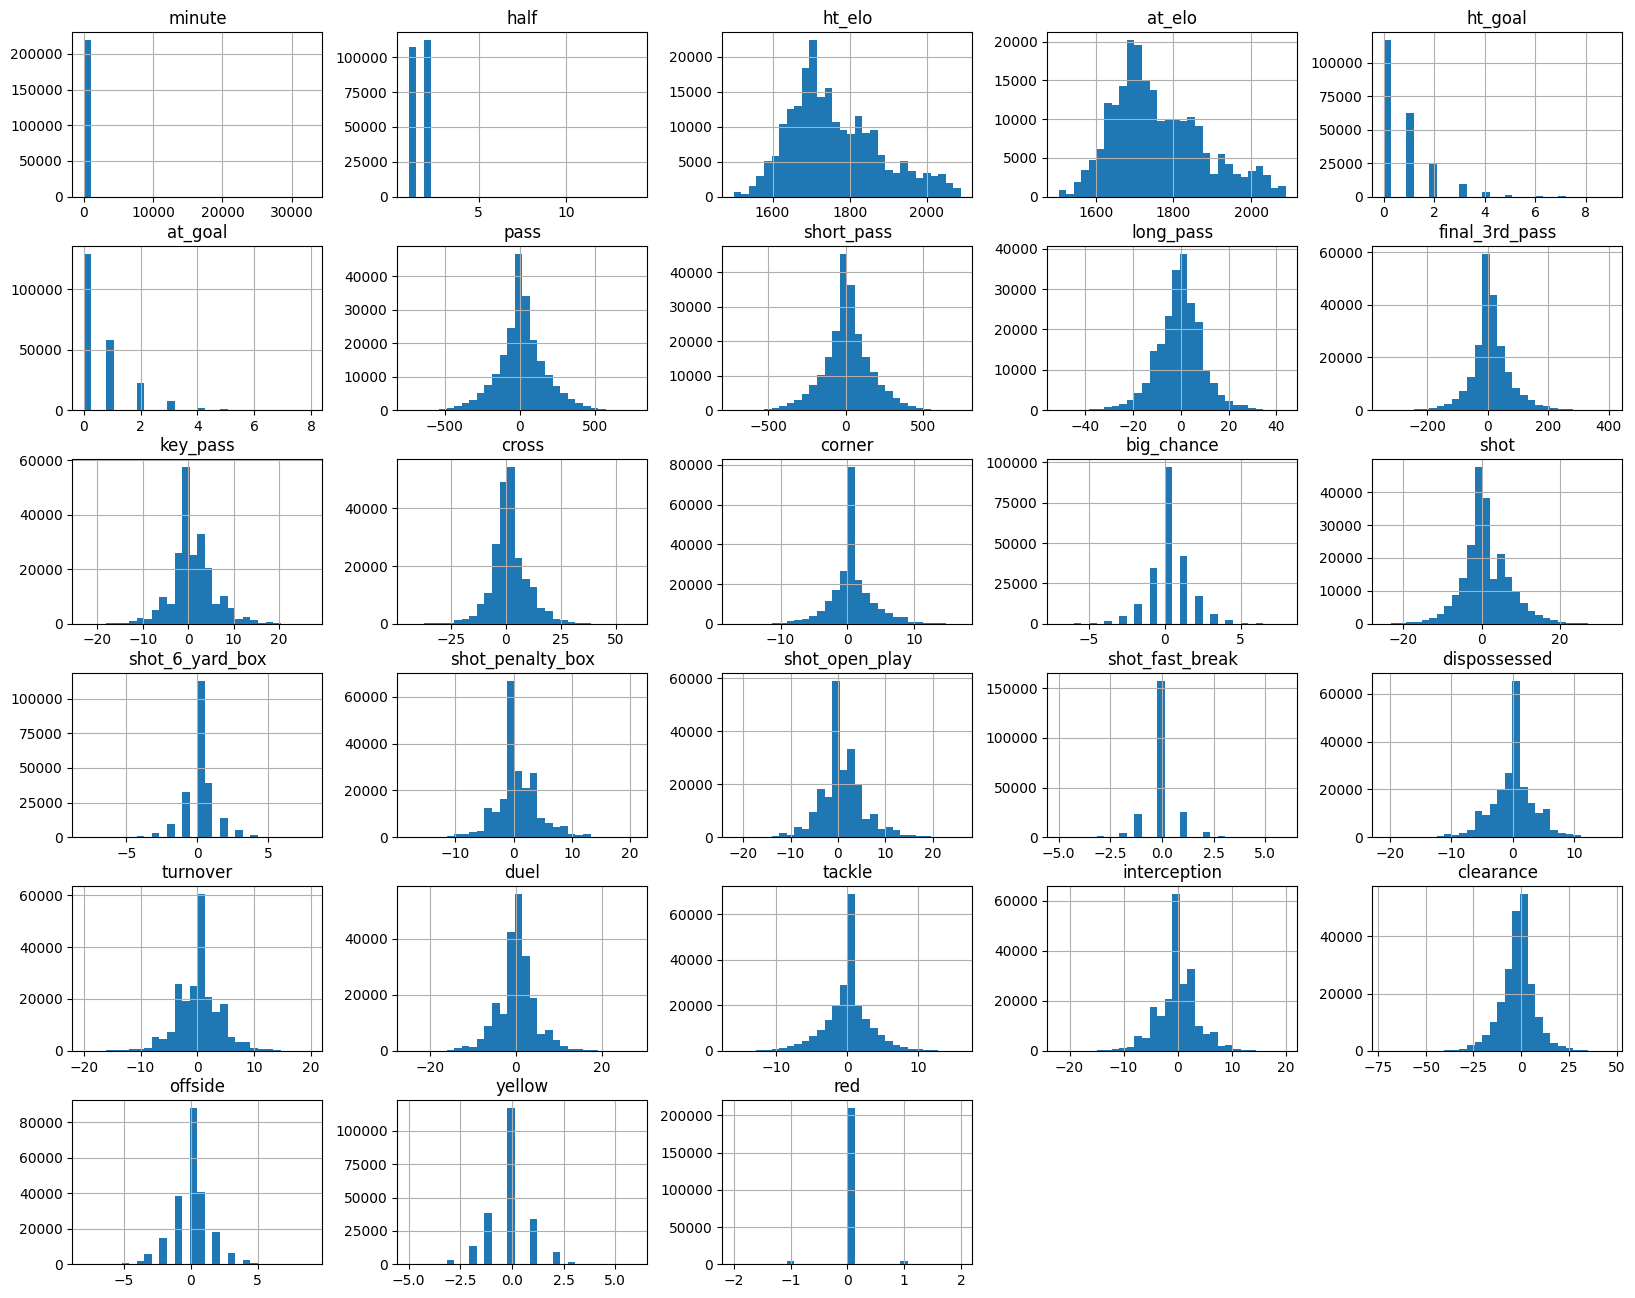

In [7]:
data.hist(bins=30, figsize=(20,16))

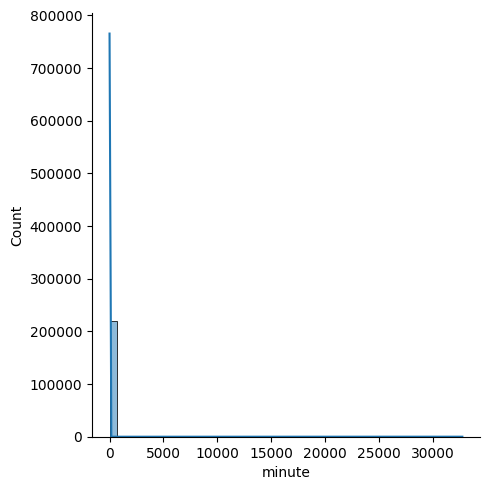

In [8]:
sns.displot(data=data, x='minute', kde=True, bins=50)

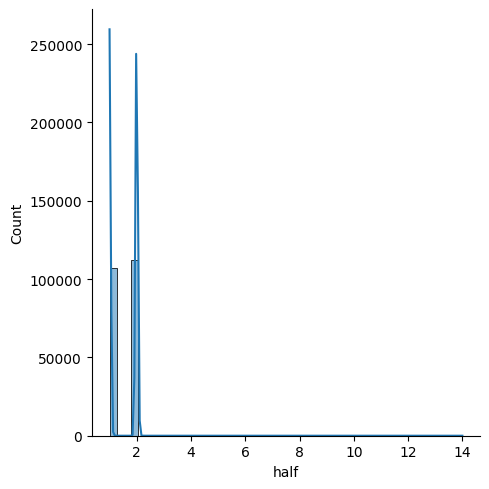

In [9]:
sns.displot(data=data, x='half', kde=True, bins=50)

In [10]:
data[data['minute']>100]

,minute,half,ht_elo,at_elo,ht_goal,at_goal,pass,short_pass,long_pass,final_3rd_pass,...,dispossessed,turnover,duel,tackle,interception,clearance,offside,yellow,red,result
2125,101,2,1687.831055,1702.815308,2,2,-1,9,-27,7,...,2,-6,-3,0,-4,-14,5,-3,0,D
2126,102,2,1687.831055,1702.815308,2,2,-2,8,-26,5,...,2,-6,-3,-1,-4,-15,5,-3,0,D
42256,101,2,1733.109375,1848.202148,1,1,-70,-96,15,68,...,-6,6,-2,0,-4,-15,-1,-1,-1,D
42257,102,2,1733.109375,1848.202148,1,1,-61,-88,16,76,...,-6,6,-2,0,-4,-16,-1,-1,-1,D
59443,101,2,1608.832520,1795.576172,0,0,-209,-190,-18,-43,...,6,0,-14,-5,-1,-16,1,1,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217327,102,2,1789.714722,1828.197876,3,2,-330,-334,13,-148,...,3,-3,2,-3,4,19,-1,-1,1,W
217328,103,2,1789.714722,1828.197876,3,2,-330,-335,14,-146,...,3,-3,2,-3,4,19,-1,-1,1,W
217329,104,2,1789.714722,1828.197876,3,2,-331,-336,14,-147,...,3,-3,2,-3,4,19,-1,-2,1,W
219103,101,2,1720.757690,1958.599121,1,2,-458,-451,16,-89,...,-9,2,-4,6,0,10,-6,3,1,L


In [ ]:
#drop data which has minute>200, that couldn't happen in reality
data = data.drop(data[(data['minute']>200)].index)
print(data.shape)

(219303, 29)


In [ ]:
#check if there is any data half that different than 1 or 2 (mistaken)
data[(data['half'] != 1) & (data['half'] != 2)]

,minute,half,ht_elo,at_elo,ht_goal,at_goal,pass,short_pass,long_pass,final_3rd_pass,...,dispossessed,turnover,duel,tackle,interception,clearance,offside,yellow,red,result


# Attributes Distribution (Full Data)

array([[<Axes: title={'center': 'minute'}>,
        <Axes: title={'center': 'half'}>,
        <Axes: title={'center': 'ht_elo'}>,
        <Axes: title={'center': 'at_elo'}>,
        <Axes: title={'center': 'ht_goal'}>],
       [<Axes: title={'center': 'at_goal'}>,
        <Axes: title={'center': 'pass'}>,
        <Axes: title={'center': 'short_pass'}>,
        <Axes: title={'center': 'long_pass'}>,
        <Axes: title={'center': 'final_3rd_pass'}>],
       [<Axes: title={'center': 'key_pass'}>,
        <Axes: title={'center': 'cross'}>,
        <Axes: title={'center': 'corner'}>,
        <Axes: title={'center': 'big_chance'}>,
        <Axes: title={'center': 'shot'}>],
       [<Axes: title={'center': 'shot_6_yard_box'}>,
        <Axes: title={'center': 'shot_penalty_box'}>,
        <Axes: title={'center': 'shot_open_play'}>,
        <Axes: title={'center': 'shot_fast_break'}>,
        <Axes: title={'center': 'dispossessed'}>],
       [<Axes: title={'center': 'turnover'}>,
        <Axe

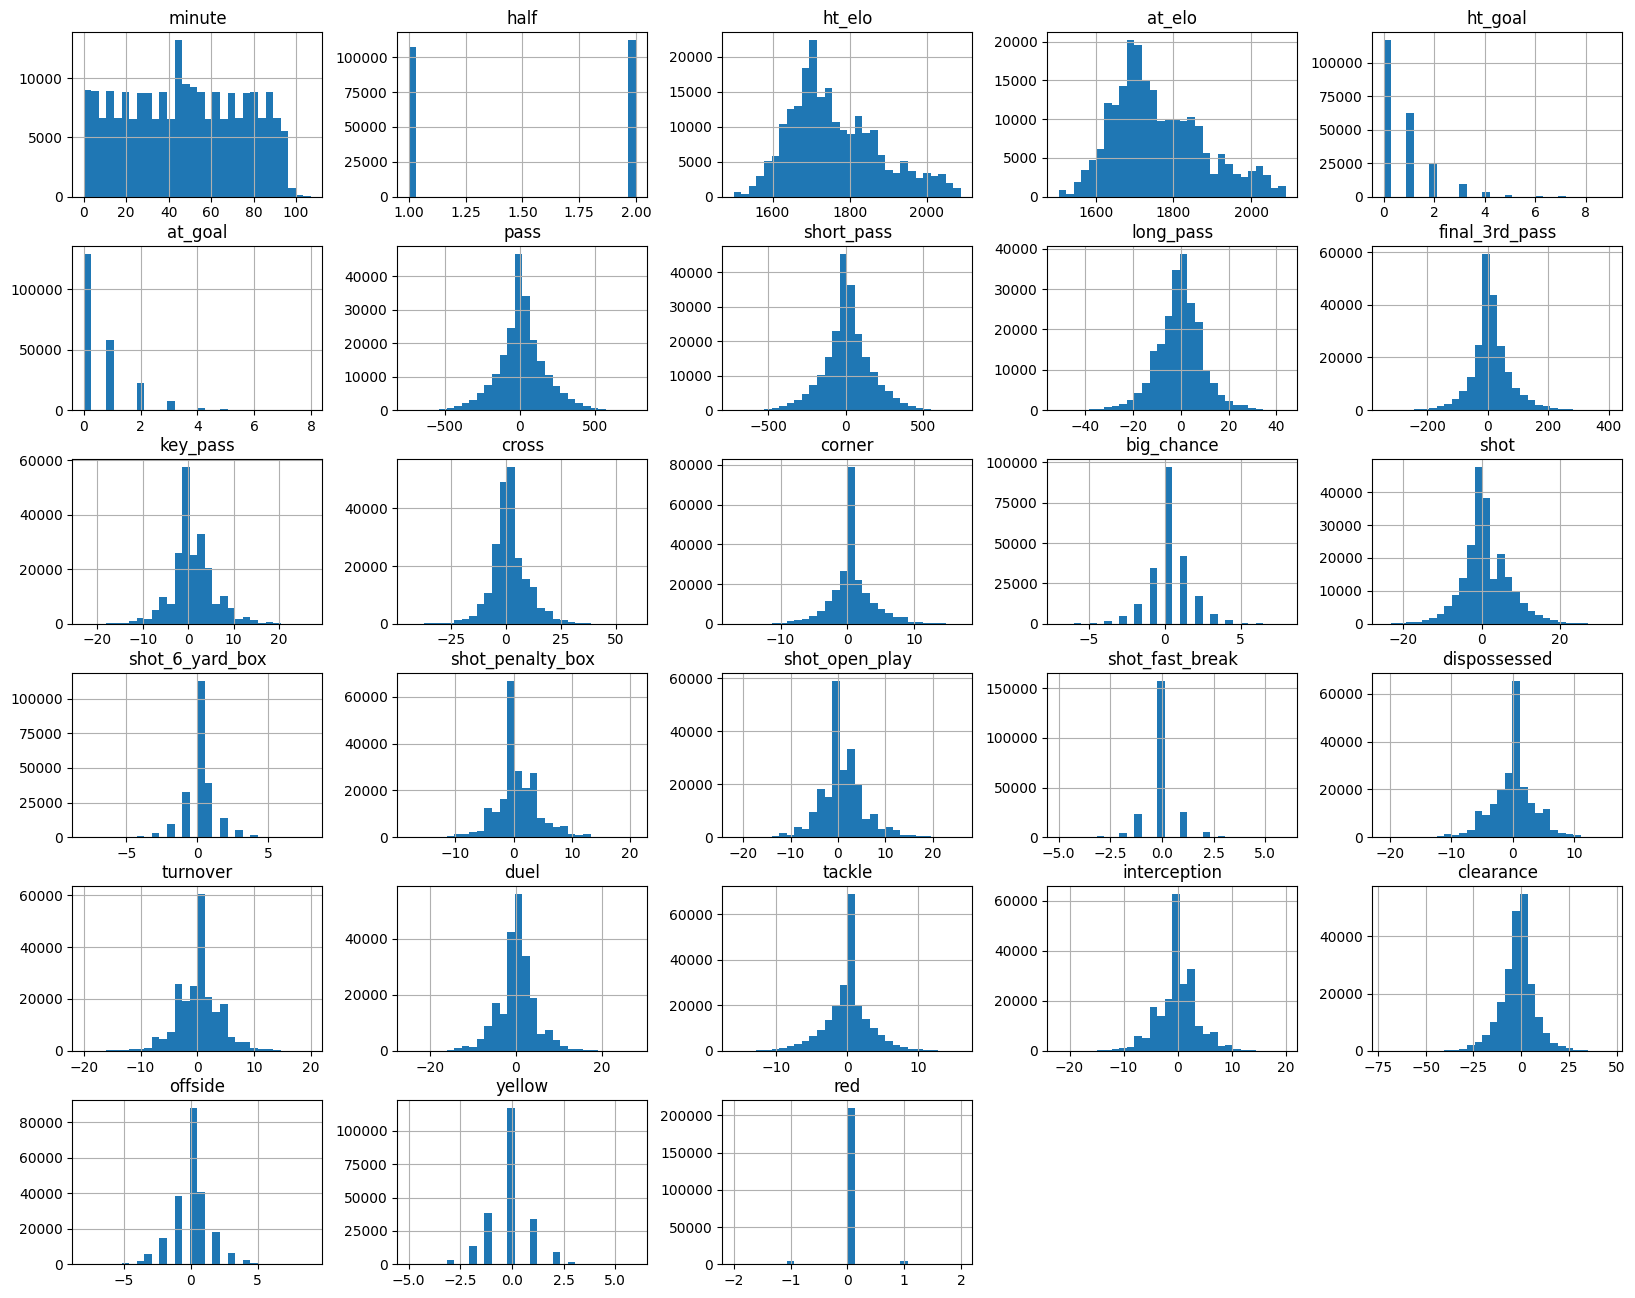

In [14]:
data.hist(bins=30, figsize=(20,16))

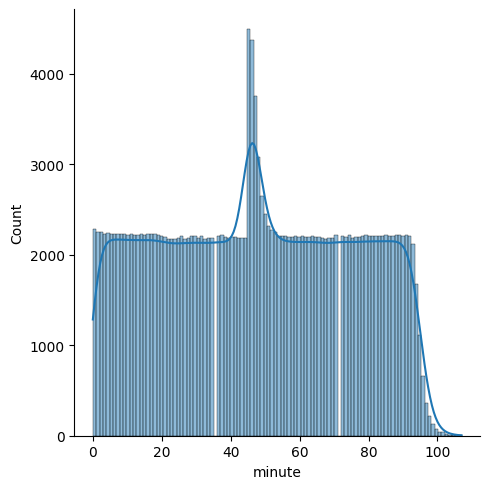

In [15]:
sns.displot(data=data, x='minute', kde=True, bins=110)

We can see that the numbers of minutes may not be equal, though we collect all from a fixed number of matches. This is because as we collect data from whoscored, in those minutes the system did not regconize any events to add into the statistics. There must be some interuptions in the field as fouls, injuries, conflicts as the referees had to stop the match in those minutes, so no events caaught and no statistics. Luckily, this happens rarely and our data are toughly stable. for the minute after 45 and before 50, the number can be twice average as the first half witnessed extra time, and those minutes are denoted as 46, 47, ... dublicates to the minutes in the second half. For the minutes after 90, numbers can be lower and decrease as far from the game time.

# Correlation Analysis (Full Data)

In [16]:
X = copy.deepcopy(data)

In [17]:
result_mapping = {'W': 1, 'D': 0, 'L': -1}
X['result'] = X['result'].map(result_mapping)

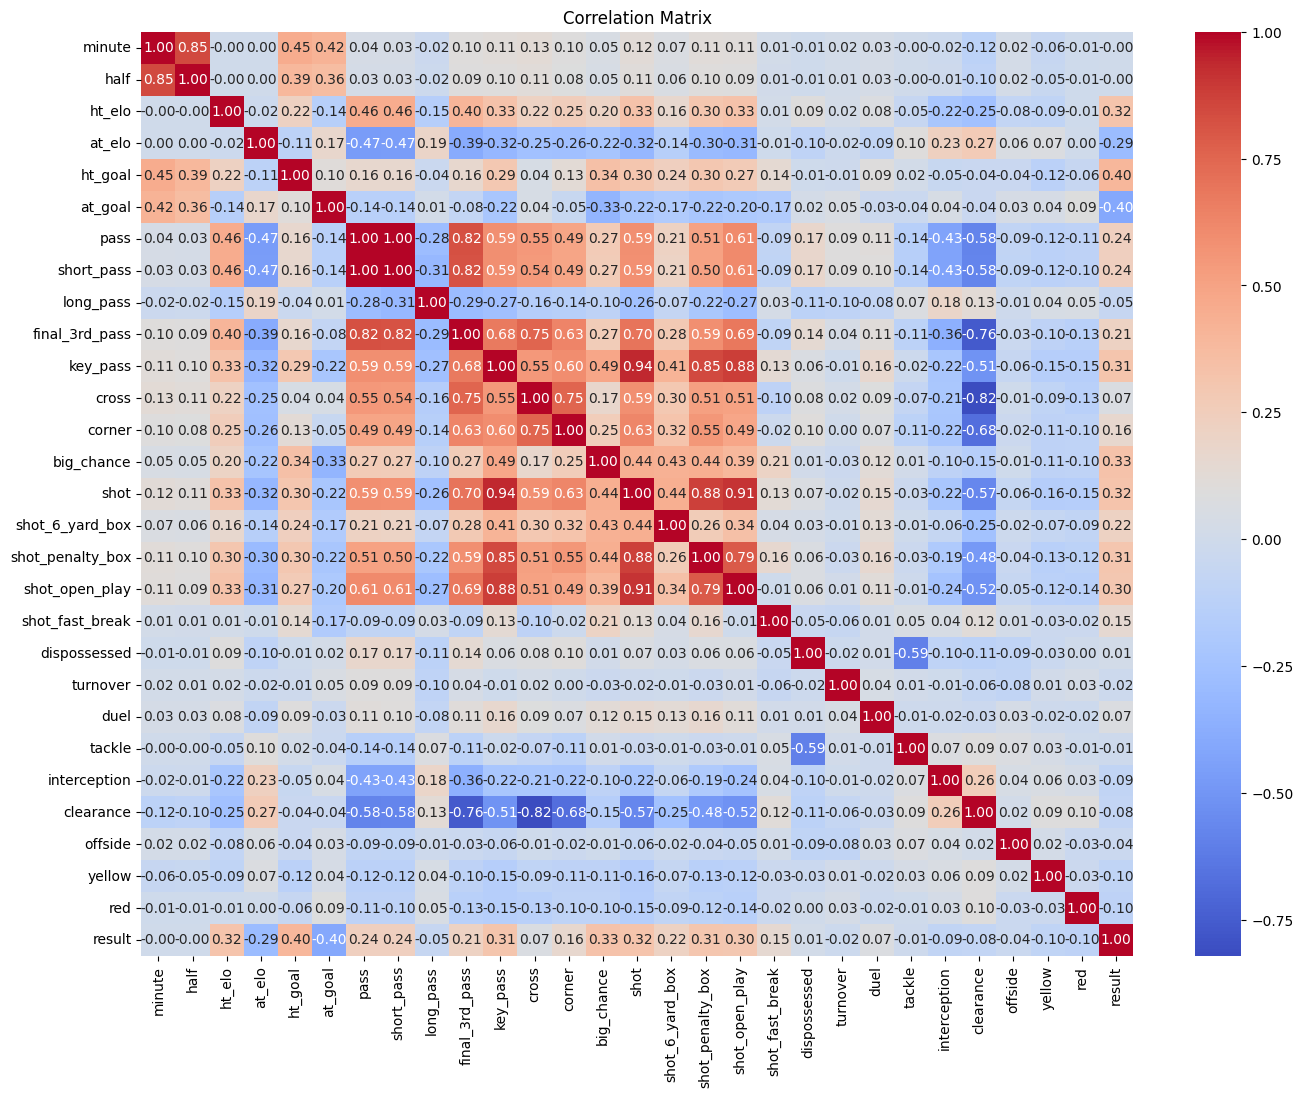

In [18]:
heatmap_data = X.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The middle section seems pretty correlated. This part includes data of passes, crosses and shots.

<Axes: xlabel='result', ylabel='count'>

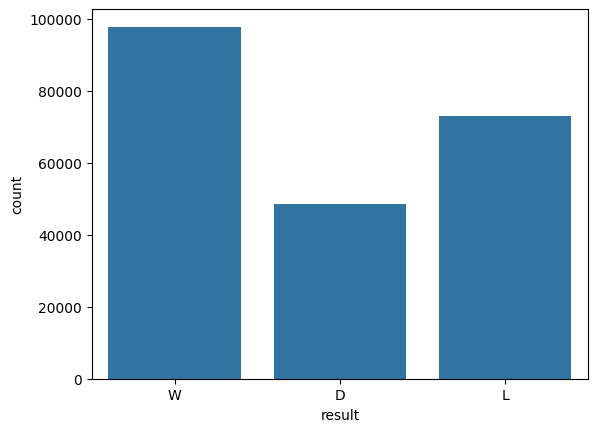

In [ ]:
#Number of matches based on results
sns.countplot(x=data['result'], order=['W', 'D', 'L'])

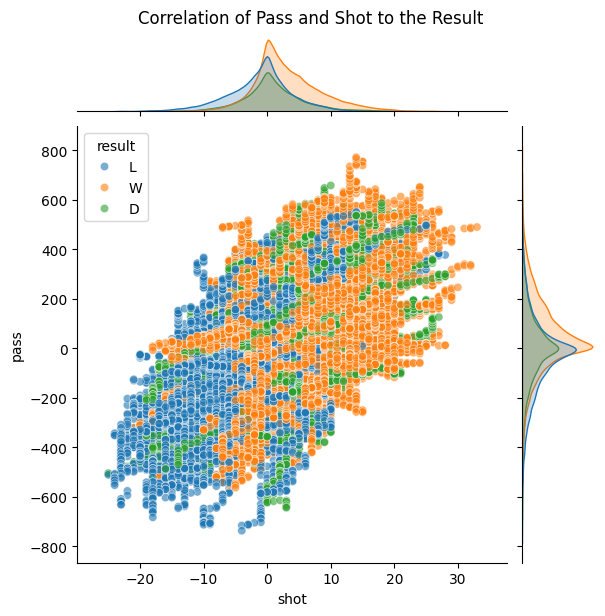

In [20]:
joint_plot = sns.jointplot(data=data, x='shot', y='pass', hue='result', alpha=0.6)
joint_plot.fig.suptitle('Correlation of Pass and Shot to the Result', y=1.02)
plt.show()

Here, the lost and winning matches seems pretty reflected, which is easy to understand. The draw has pretty uniform distribution.

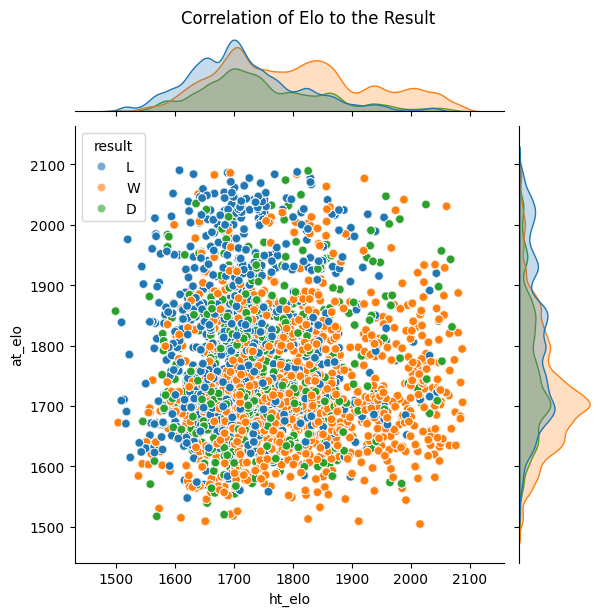

In [21]:
joint_plot2 = sns.jointplot(data=data, x='ht_elo', y='at_elo', hue='result', alpha=0.6)
joint_plot2.fig.suptitle('Correlation of Elo to the Result', y=1.02)
plt.show()

In [22]:
extra = copy.deepcopy(data)
extra['elo'] = extra['ht_elo'] - extra['at_elo']

In [23]:
extra

,minute,half,ht_elo,at_elo,ht_goal,at_goal,pass,short_pass,long_pass,final_3rd_pass,...,turnover,duel,tackle,interception,clearance,offside,yellow,red,result,elo
0,0,1,1824.001221,1974.961670,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,L,-150.960449
1,1,1,1824.001221,1974.961670,0,0,13,11,3,0,...,0,-1,0,0,0,0,0,0,L,-150.960449
2,2,1,1824.001221,1974.961670,0,0,16,13,4,3,...,1,0,0,0,-1,0,0,0,L,-150.960449
3,3,1,1824.001221,1974.961670,0,0,21,18,4,2,...,0,0,1,0,-1,0,0,0,L,-150.960449
4,4,1,1824.001221,1974.961670,0,0,18,15,5,4,...,-1,0,1,0,-1,1,-1,0,L,-150.960449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219300,91,2,1732.150269,1790.456909,5,0,306,299,-1,64,...,0,10,2,-3,8,0,1,0,W,-58.306641
219301,92,2,1732.150269,1790.456909,5,0,296,289,0,65,...,0,9,2,-4,8,0,1,0,W,-58.306641
219302,93,2,1732.150269,1790.456909,5,0,293,285,1,64,...,0,9,2,-4,8,0,1,0,W,-58.306641
219303,94,2,1732.150269,1790.456909,5,0,300,292,2,65,...,0,9,2,-4,7,0,1,0,W,-58.306641


In [24]:
extra['goal'] = extra['ht_goal'] - extra['at_goal']

In [25]:
extra['all_goal'] = extra['ht_goal'] + extra['at_goal']

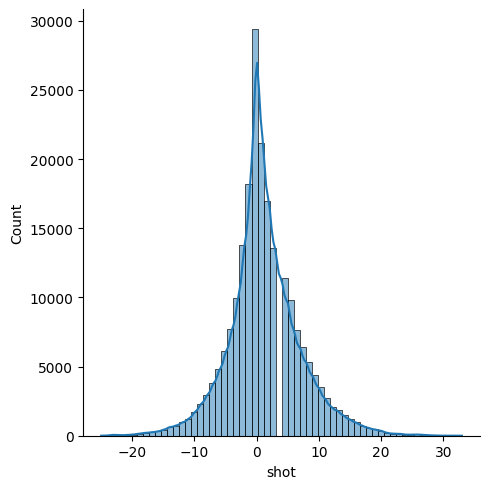

In [26]:
sns.displot(data=extra, x='shot', kde=True, bins=60)

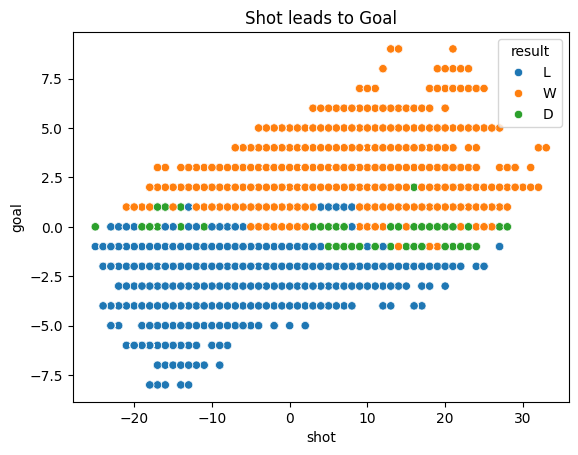

In [27]:
sns.scatterplot(data=extra, x='shot', y='goal', hue='result')
plt.title('Shot leads to Goal')
plt.show()

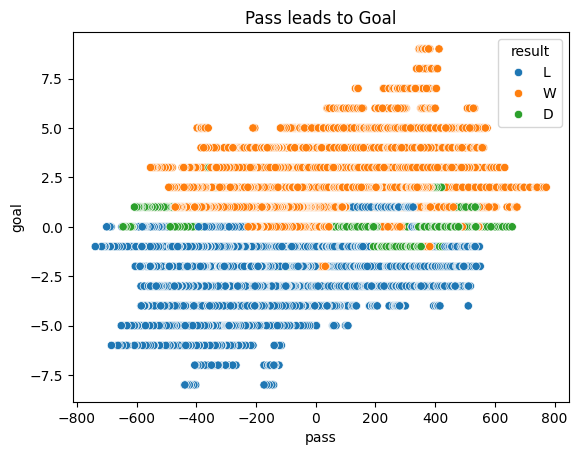

In [28]:
sns.scatterplot(data=extra, x='pass', y='goal', hue='result')
plt.title('Pass leads to Goal')
plt.show()

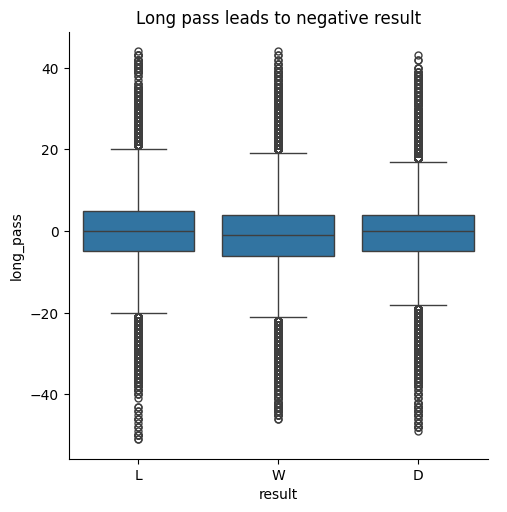

In [29]:
sns.catplot(data=extra, x='result', y='long_pass', kind='box')
plt.title('Long pass leads to negative result')
plt.show()

In [30]:
extra['red'].describe()

,red
count,219303.000000
mean,-0.001997
std,0.215190
min,-2.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


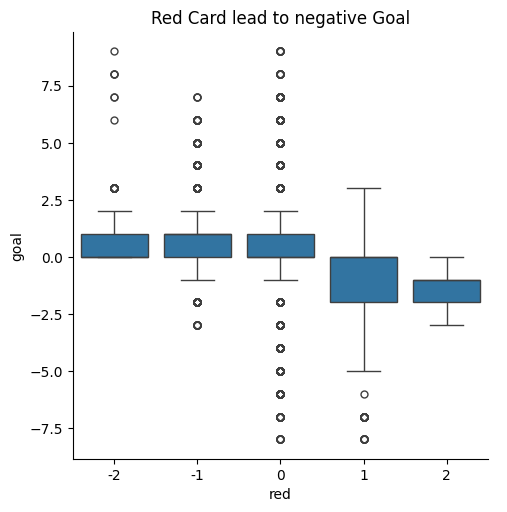

In [31]:
sns.catplot(data=extra, x='red', y='goal', kind='box', order = [-2,-1,0,1,2])
plt.title('Red Card lead to negative Goal')
plt.show()

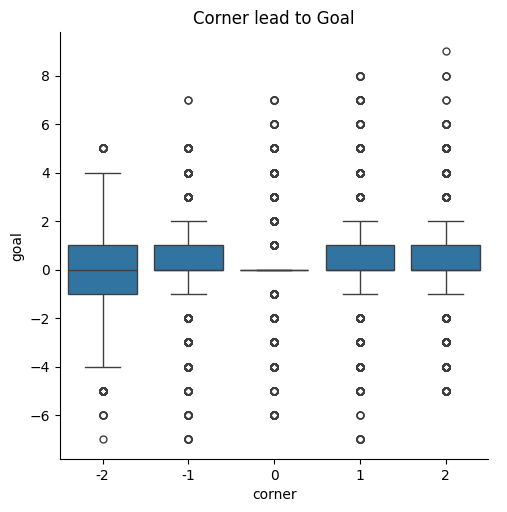

In [32]:
sns.catplot(data=extra, x='corner', y='goal', kind='box', order = [-2,-1,0,1,2])
plt.title('Corner lead to Goal')
plt.show()

# Distrubution at minute 90

In [33]:
full_time = extra[extra['minute'] == 90]

In [34]:
full_time

,minute,half,ht_elo,at_elo,ht_goal,at_goal,pass,short_pass,long_pass,final_3rd_pass,...,tackle,interception,clearance,offside,yellow,red,result,elo,goal,all_goal
92,90,2,1824.001221,1974.961670,0,2,-121,-127,6,-40,...,9,-1,11,5,0,0,L,-150.960449,-2,2
188,90,2,1673.780518,1576.490356,1,0,221,215,-17,32,...,-6,-11,3,-2,0,0,W,97.290161,1,1
284,90,2,1633.799683,1692.951660,0,2,329,312,17,93,...,5,2,-6,0,-1,0,L,-59.151978,-2,2
382,90,2,1567.101318,1837.004272,0,3,-304,-319,31,-18,...,16,8,-8,1,1,0,L,-269.902954,-3,3
477,90,2,1917.330200,1673.732788,4,0,298,293,-8,135,...,0,-2,-11,1,-1,0,W,243.597412,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218803,90,2,1825.688599,1797.254761,2,1,-81,-73,-3,79,...,6,-4,-6,2,3,0,W,28.433838,1,3
218998,90,2,1826.812622,1653.539429,1,1,413,413,-36,118,...,-10,-4,-23,1,-4,0,D,173.273193,0,2
219092,90,2,1720.757690,1958.599121,1,1,-392,-386,13,-83,...,5,3,11,-5,4,1,L,-237.841431,0,2
219197,90,2,1727.256714,1791.338135,1,0,-405,-406,15,-84,...,-1,10,-2,1,0,0,W,-64.081421,1,1


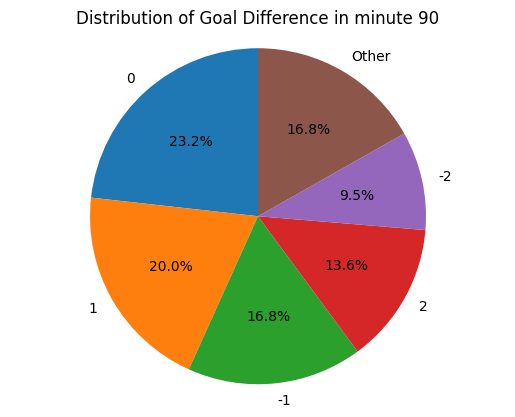

In [35]:
counts = full_time['goal'].value_counts()
counts.loc['Other'] = counts[(counts / counts.sum()) < 0.06].sum()
counts = counts[(counts / counts.sum()) >= 0.06]
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
sns.set(style='white')
plt.title('Distribution of Goal Difference in minute 90')
plt.show()

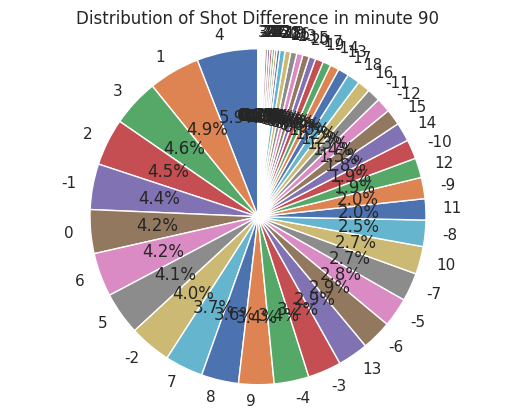

In [36]:
counts = full_time['shot'].value_counts()
# counts.loc['Other'] = counts[(counts / counts.sum()) < 0.06].sum()
# counts = counts[(counts / counts.sum()) >= 0.06]
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
sns.set(style='white')
plt.title('Distribution of Shot Difference in minute 90')
plt.show()

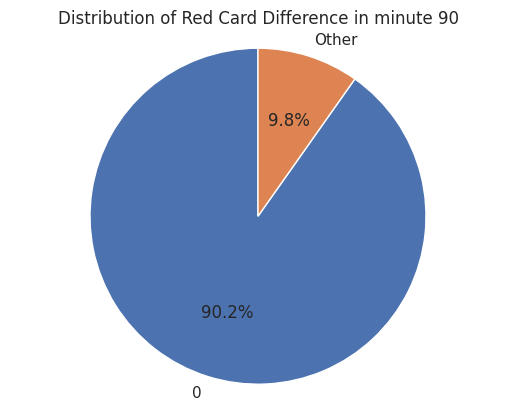

In [37]:
counts = full_time['red'].value_counts()
counts.loc['Other'] = counts[(counts / counts.sum()) < 0.06].sum()
counts = counts[(counts / counts.sum()) >= 0.06]
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
sns.set(style='white')
plt.title('Distribution of Red Card Difference in minute 90')
plt.show()

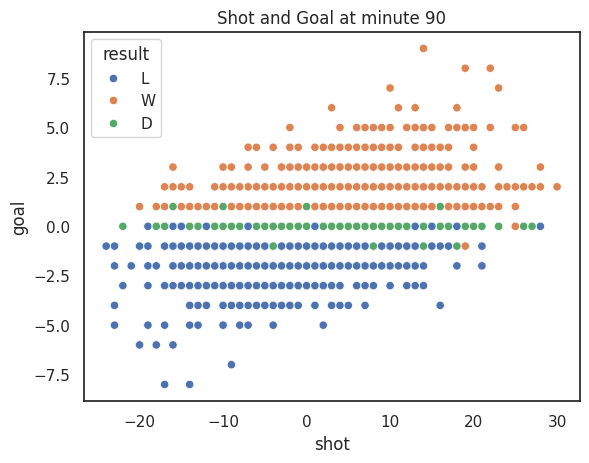

In [38]:
sns.scatterplot(data=full_time, x='shot', y='goal', hue='result')
plt.title('Shot and Goal at minute 90')
plt.show()

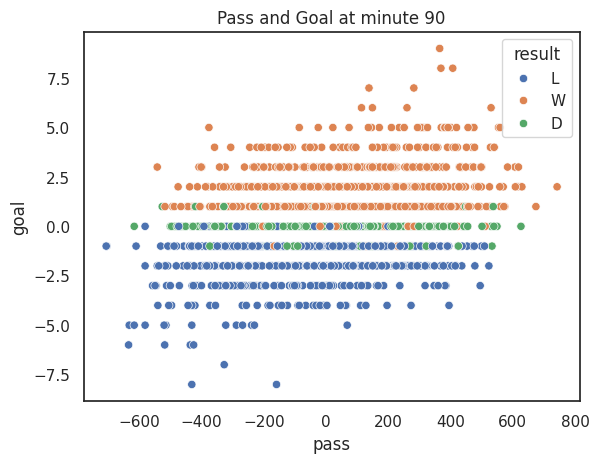

In [39]:
sns.scatterplot(data=full_time, x='pass', y='goal', hue='result')
plt.title('Pass and Goal at minute 90')
plt.show()

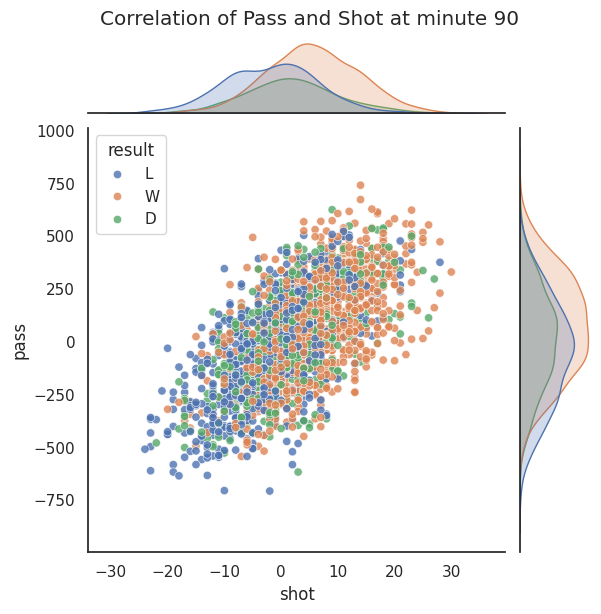

In [40]:
joint_plot = sns.jointplot(data=full_time, x='shot', y='pass', hue='result', alpha=0.8)
joint_plot.fig.suptitle('Correlation of Pass and Shot at minute 90', y=1.02)
plt.show()

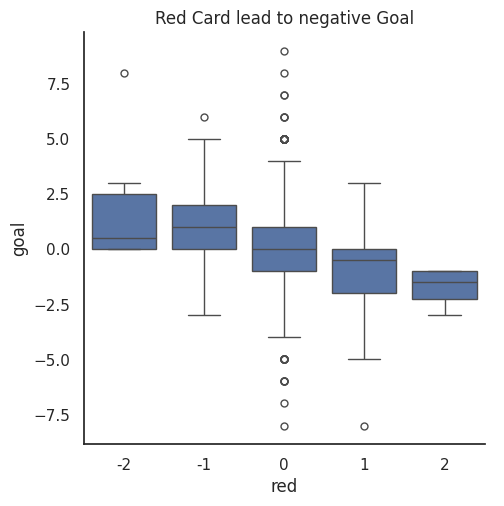

In [41]:
sns.catplot(data=full_time, x='red', y='goal', kind='box', order = [-2,-1,0,1,2])
plt.title('Red Card lead to negative Goal')
plt.show()

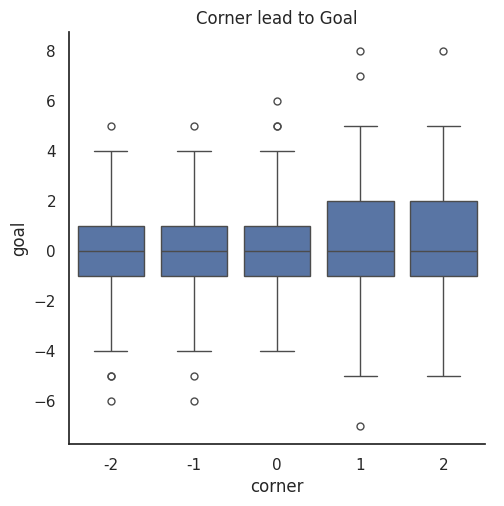

In [42]:
sns.catplot(data=full_time, x='corner', y='goal', kind='box', order = [-2,-1,0,1,2])
plt.title('Corner lead to Goal')
plt.show()

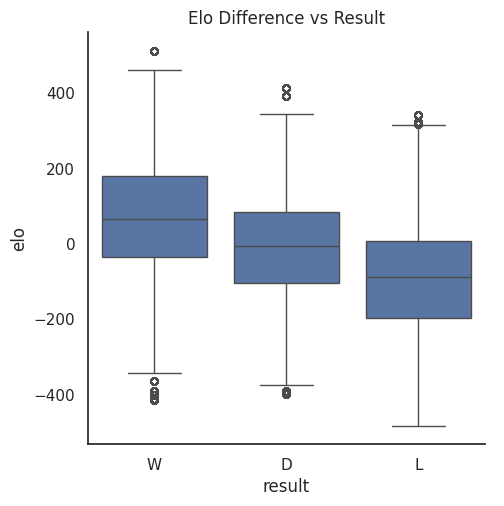

In [43]:
sns.catplot(data=extra, x='result', y='elo', kind='box', order = ['W', 'D', 'L'])
plt.title('Elo Difference vs Result')
plt.show()

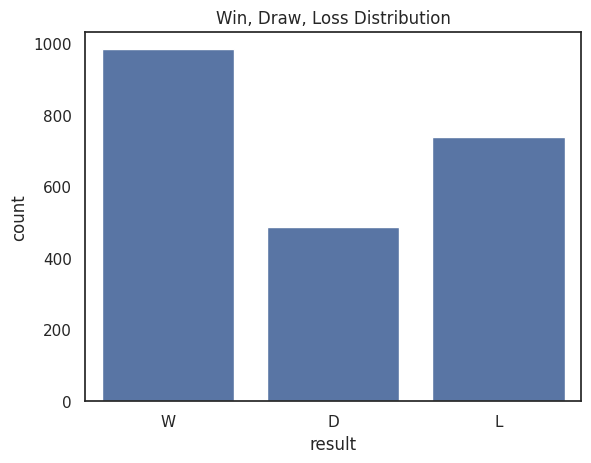

In [44]:
sns.countplot(x=full_time['result'], order=['W', 'D', 'L'])
plt.title('Win, Draw, Loss Distribution')
plt.show()

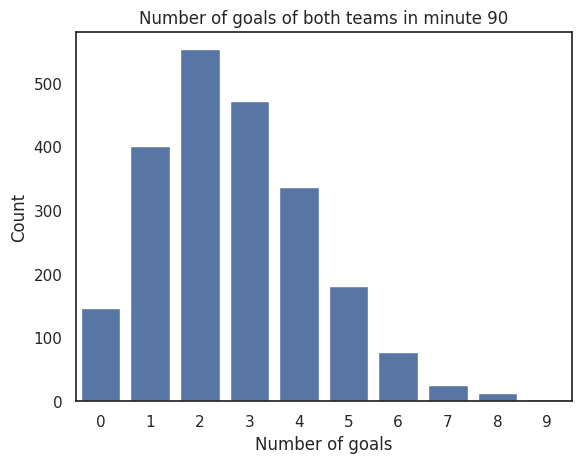

In [45]:
goals = copy.deepcopy(full_time)
goals['all_goal'] = round(goals['ht_goal'] + goals['at_goal'])
ax = sns.countplot(x=goals['all_goal'])
plt.title('Number of goals of both teams in minute 90')
ax.set_xlabel('Number of goals')
ax.set_ylabel('Count')
plt.show()

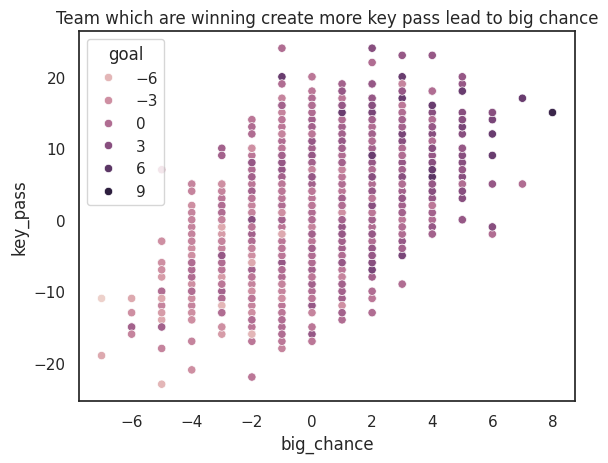

In [46]:
sns.scatterplot(data=full_time, x='big_chance', y='key_pass', hue='goal')
plt.title('Team which are winning create more key pass lead to big chance')
plt.show()

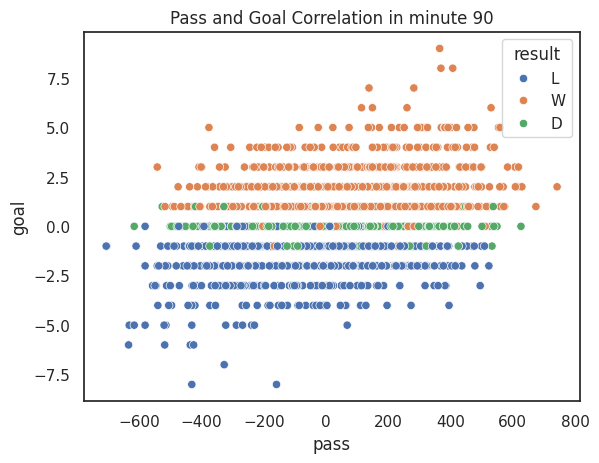

In [47]:
sns.scatterplot(data=full_time, x='pass', y='goal', hue='result')
plt.title('Pass and Goal Correlation in minute 90')
plt.show()

In [48]:
average = X.groupby('minute').mean().reset_index()

In [49]:
average = average[average['minute'] <= 90]

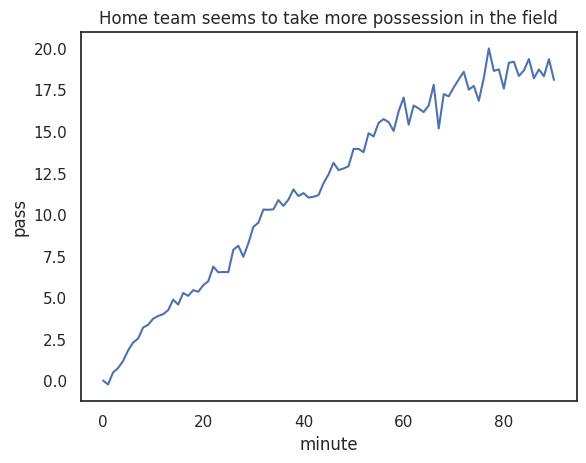

In [50]:
sns.lineplot(data=average, x='minute', y='pass')
plt.title('Home team seems to take more possession in the field')
plt.show()

# Distribution of a match

In [52]:
match_example = pd.read_csv('/content/drive/MyDrive/EPL/dataH/match/1284741.csv')

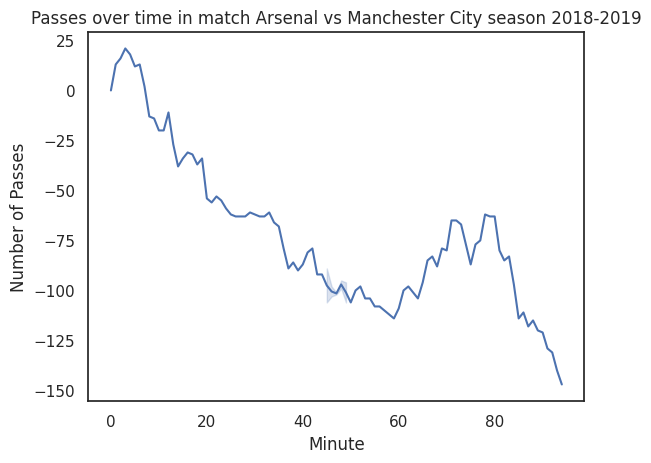

In [53]:
sns.lineplot(data = match_example, x = 'minute', y = 'pass')
plt.title('Passes over time in match Arsenal vs Manchester City season 2018-2019')
plt.xlabel('Minute')
plt.ylabel('Number of Passes')
plt.show()

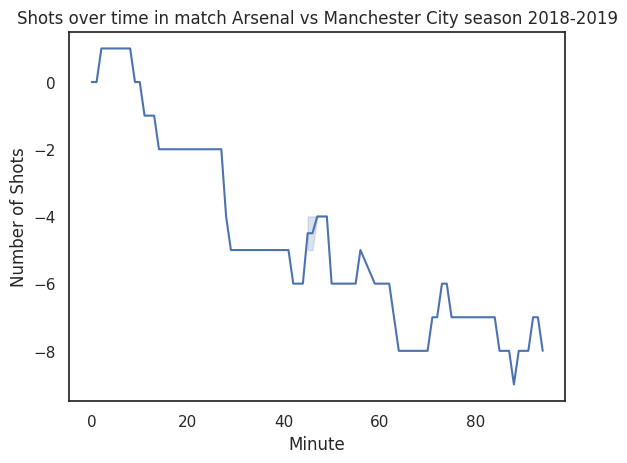

In [54]:
sns.lineplot(data = match_example, x = 'minute', y = 'shot')
plt.title('Shots over time in match Arsenal vs Manchester City season 2018-2019')
plt.xlabel('Minute')
plt.ylabel('Number of Shots')
plt.show()